In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram,plot_gate_map,plot_circuit_layout
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city,plot_state_qsphere
from qiskit.tools.monitor import job_monitor
%matplotlib inline

#X gate

In [32]:
qr= QuantumRegister(1)
cr= ClassicalRegister(3)
qc= QuantumCircuit(qr,cr)
qc.x(0)
#qc.measure(0,0)
qc.measure(0,1)
qc.draw()

In [33]:
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator


In [2]:
bc1=Aer.get_backend("qasm_simulator")
bc2=Aer.get_backend("statevector_simulator")
bc3=Aer.get_backend("unitary_simulator")

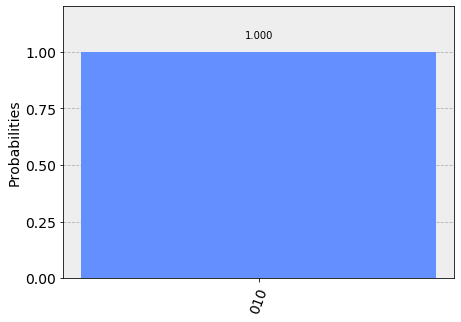

In [35]:
job1=execute(qc,bc1,shots=3000).result().get_counts()#quasm
plot_histogram(job1)


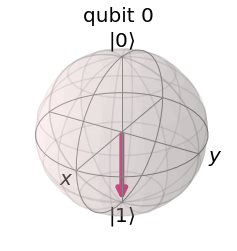

In [27]:

plot_bloch_multivector(job2)

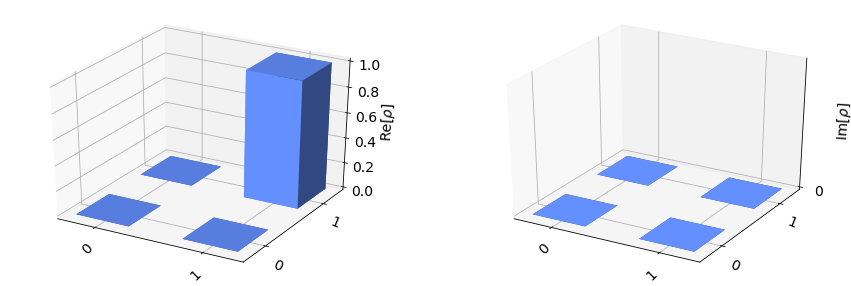

In [28]:

plot_state_city(job2)

In [9]:
#plot_state_qsphere(job2)

In [10]:
# job3=execute(qc,bc3).result().get_unitary()#uni does not work when measured
# print(job3)

#
H gate

In [13]:
qr= QuantumRegister(2)
cr= ClassicalRegister(2)
qc= QuantumCircuit(qr,cr)
qc.h(0)
qc.measure(0,0)
#qc.measure(1,1)
qc.draw()

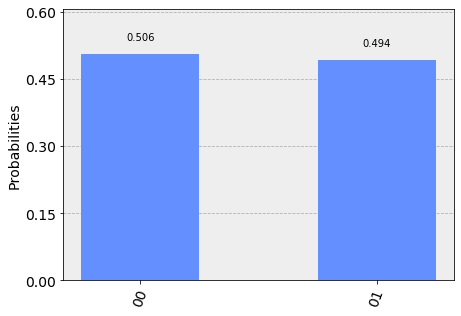

In [14]:
job1=execute(qc,bc1,shots=3000).result().get_counts()#quasm
plot_histogram(job1)# output of measurement only


In [52]:
job2=execute(qc,bc2).result().get_statevector()#sv
for amplitude in job2:
    print(amplitude)

(0.7071067811865476+0j)
(0.7071067811865476+0j)
0j
0j


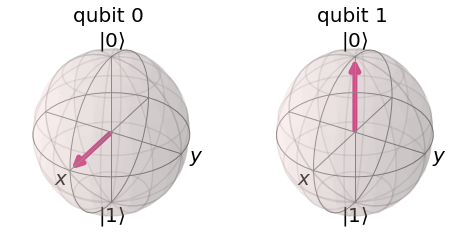

In [53]:
plot_bloch_multivector(job2) # output of individual qbits


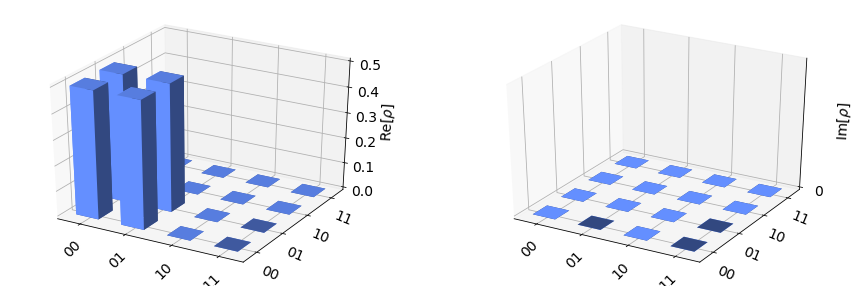

In [54]:
plot_state_city(job2) #output of individual states

In [55]:
# job3=execute(qc,bc3).result().get_unitary()#uni does not work when measured
# print(job3)

In [80]:
qr= QuantumRegister(2)
cr= ClassicalRegister(2)
qc= QuantumCircuit(qr,cr)
qc.y(0)
# qc.cz(0,1)
qc.measure(0,0)
# qc.measure(1,1)
# qc.measure(2,2)
qc.draw()

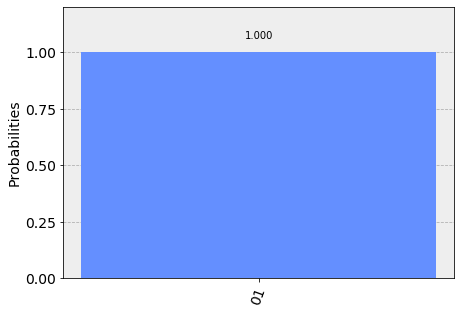

In [81]:
job1=execute(qc,bc1,shots=3000).result().get_counts()#quasm
plot_histogram(job1)# output of measurement only


In [82]:
job2=execute(qc,bc2).result().get_statevector()#sv
for amplitude in job2:
    print(amplitude)

0j
1j
0j
0j


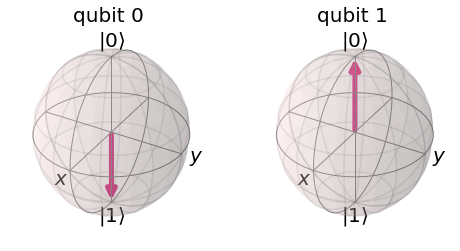

In [83]:
plot_bloch_multivector(job2) # output of individual qbits

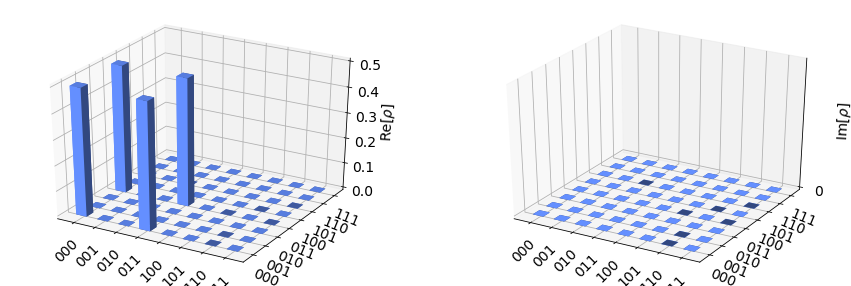

In [60]:
plot_state_city(job2) #output of individual states

In [103]:
qr= QuantumRegister(2)
cr= ClassicalRegister(2)
qc= QuantumCircuit(qr,cr)
qc.h(0)
qc.y(0)
# qc.cz(0,1)
#qc.measure(0,0)
# qc.measure(1,1)
# qc.measure(2,2)
qc.draw()

No measurements in circuit "circuit66": count data will return all zeros.


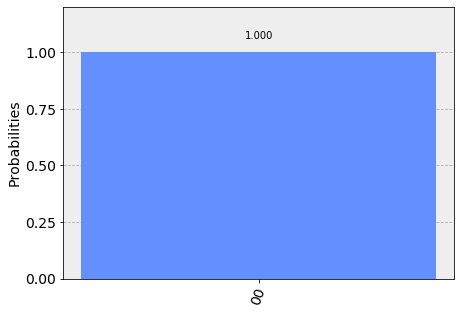

In [104]:
job1=execute(qc,bc1,shots=3000).result().get_counts()#quasm
plot_histogram(job1)# output of measurement only


In [105]:
job2=execute(qc,bc2).result().get_statevector()#sv
for amplitude in job2:
    print(amplitude)

0j
1j
0j
0j


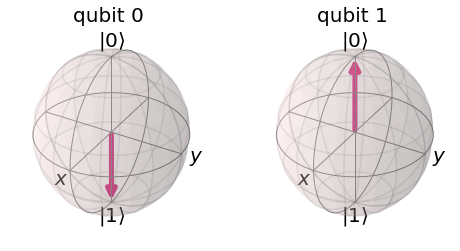

In [106]:
plot_bloch_multivector(job2) # output of individual qbits

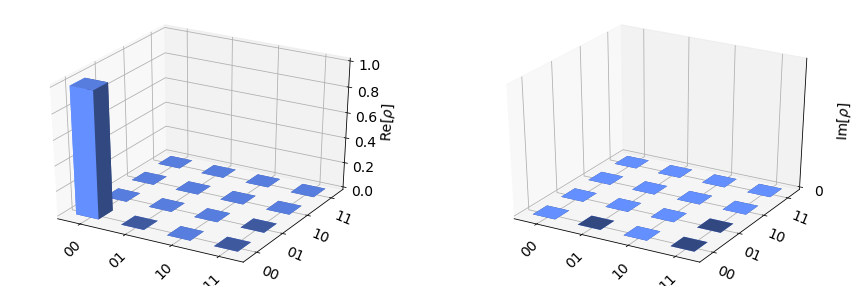

In [90]:
plot_state_city(job2) #output of individual states

In [4]:
#ghz
qr= QuantumRegister(4)
cr= ClassicalRegister(4)
qc= QuantumCircuit(qr,cr)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw()

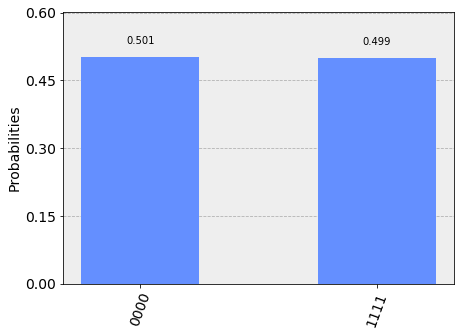

In [7]:
job1=execute(qc,bc1,shots=3000).result().get_counts()#quasm
plot_histogram(job1)# output of measurement only


In [8]:
job2=execute(qc,bc2).result().get_statevector()#sv
for amplitude in job2:
    print(amplitude)

0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
(1+0j)


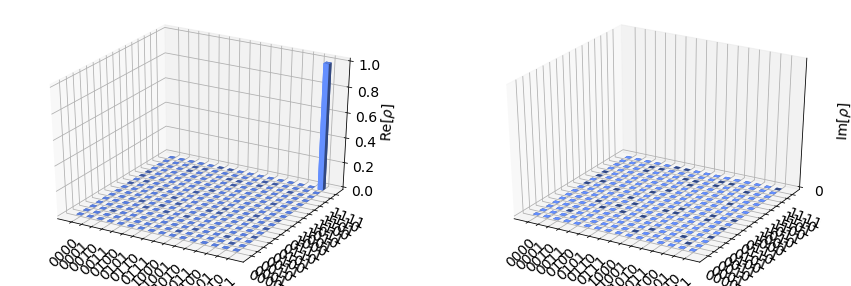

In [9]:
plot_state_city(job2) #output of individual states

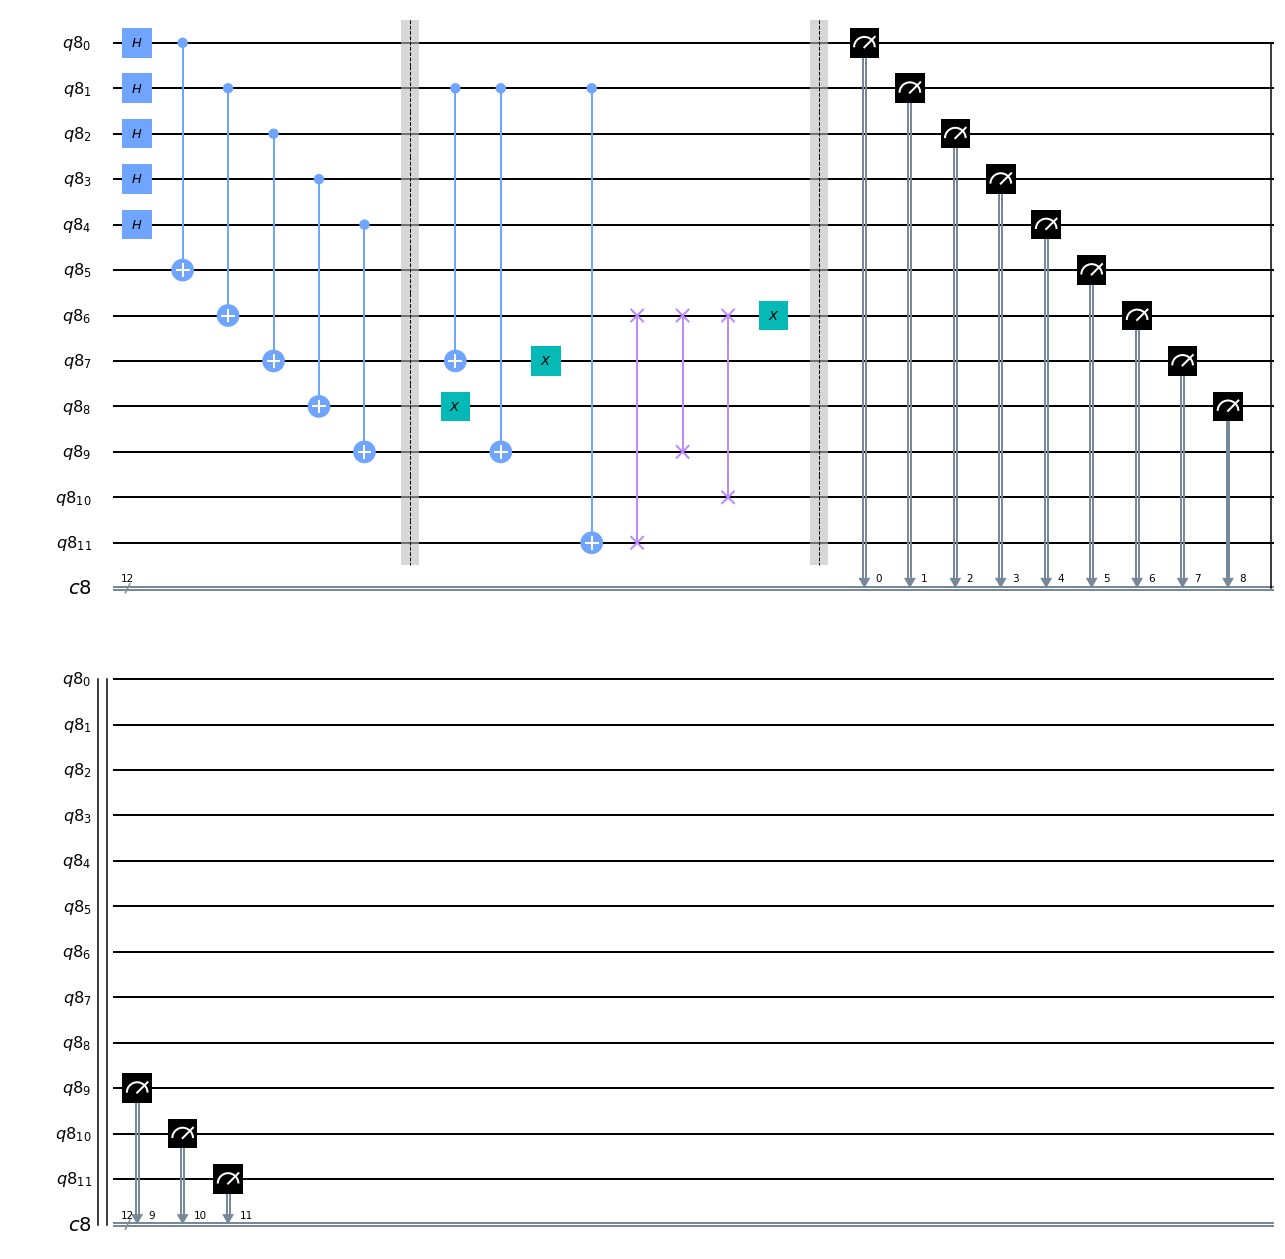

In [23]:
qr=QuantumRegister(12)
cr=ClassicalRegister(12)
qc = QuantumCircuit(qr,cr)


for idx in range(5):
    qc.h(idx)
    qc.cx(idx, idx+5)
qc.barrier()
#qc.measure(range(9), range(9))
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.barrier()
qc.measure(range(12), range(12))
qc.draw(output='mpl')

In [24]:
print(qc.width())# it includes classical and quantum
print(qc.n_qubits)# only quantum
print(qc.count_ops())# to get the number and type of the gates in a circuit 
print(qc.size())#the raw count of operations by computing the circuits size.
print(qc.depth()) # no of parallel operaations
print(qc.num_unitary_factors())# no of gates actually required to run the operation 
# wrong misinterpretation of unitary

24
12
OrderedDict([('measure', 12), ('cx', 8), ('h', 5), ('x', 3), ('swap', 3), ('barrier', 2)])
31
10
3


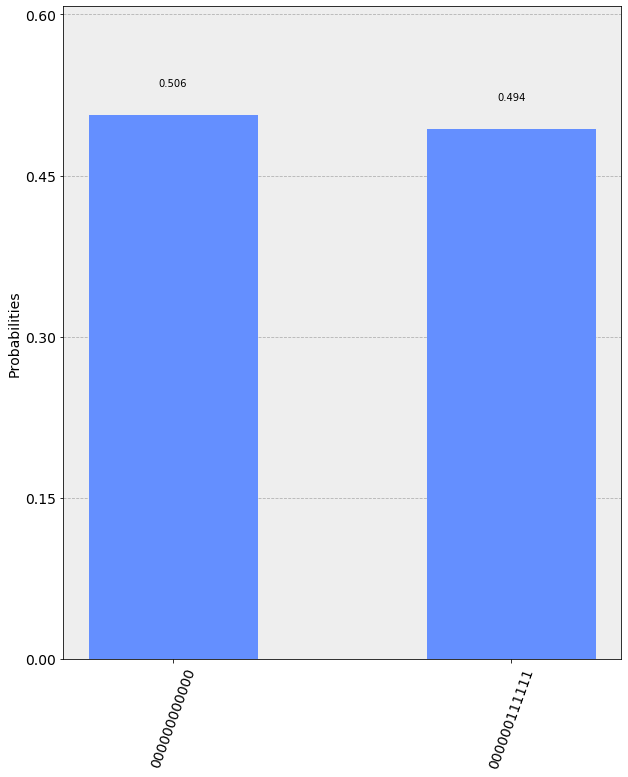

In [13]:
res=execute(qc,bc1,shots=3000).result().get_counts()
plot_histogram(res,figsize=(10,12))

In [25]:
#INTERNAL composition ie decomposition
qc3 = QuantumCircuit(2)
qc3.swap(0,1)
qc3.decompose().draw()

In [17]:
qr= QuantumRegister(3)
cr= ClassicalRegister(3)
qc= QuantumCircuit(qr,cr)
qc.x(0)
qc.y(0)
qc.h(1)
#qc.z(1)
qc.y(2)
#qc.z(2)
#qc.measure(range(3),range(3))

qc.draw()

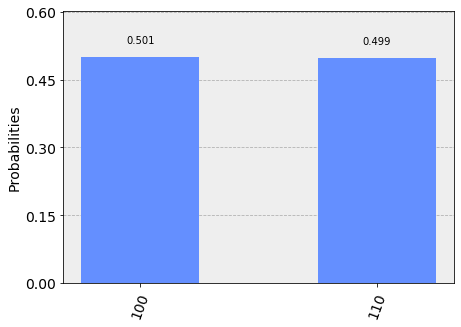

In [11]:
res=execute(qc,bc1,shots=3000).result().get_counts()
plot_histogram(res)

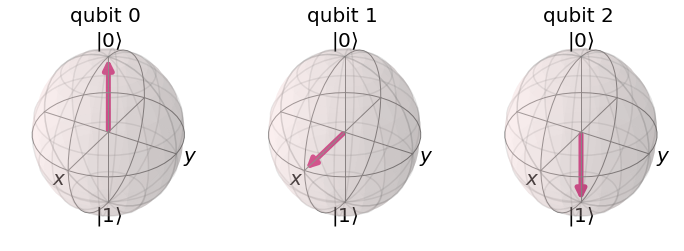

In [18]:
res=execute(qc,bc2).result().get_statevector()
plot_bloch_multivector(res)

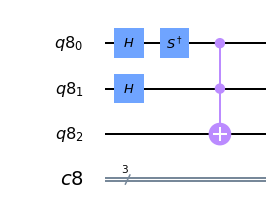

In [28]:
#clifford
qr= QuantumRegister(3)
cr= ClassicalRegister(3)
qc= QuantumCircuit(qr,cr)
qc.h(0)
qc.h(1)
qc.sdg(0)
qc.ccx(0,1,2)
# qc.measure(0,0)
# qc.measure(1,1)
qc.draw(output='mpl')

No measurements in circuit "circuit24": count data will return all zeros.


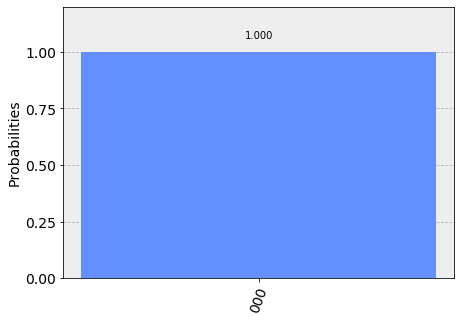

In [29]:
res=execute(qc,bc1,shots=3000).result().get_counts()
plot_histogram(res)

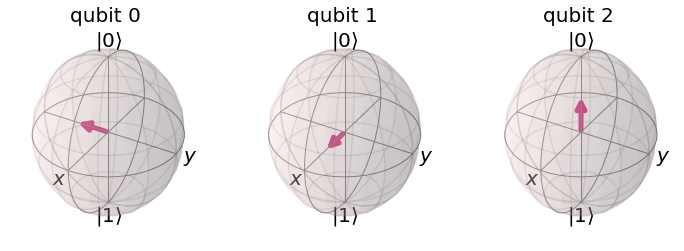

In [30]:
res=execute(qc,bc2).result().get_statevector()
plot_bloch_multivector(res)

In [3]:
qc=QuantumCircuit(2,2)
qc.sdg(0)
qc.cx(0,1)
qc.s(0)
qc.draw()

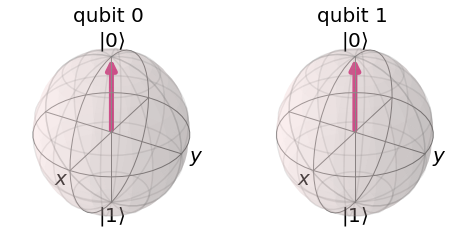

In [4]:
res=execute(qc,bc2).result().get_statevector()
plot_bloch_multivector(res)

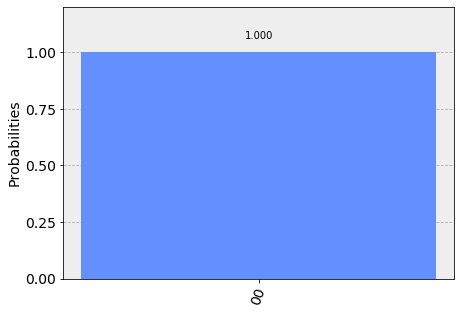

In [5]:
qc.measure(0,0)
qc.measure(1,1)
res=execute(qc,bc1,shots=3000).result().get_counts()
plot_histogram(res)

In [10]:
QC=QuantumCircuit(2,2)
QC.x(0)
QC.ch(0,1)
QC.draw()

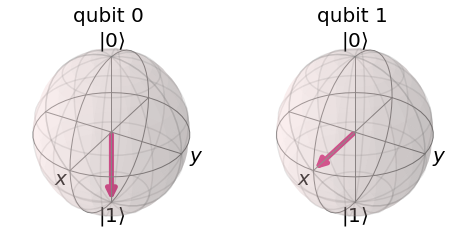

In [11]:
res=execute(QC,bc2).result().get_statevector()
plot_bloch_multivector(res)

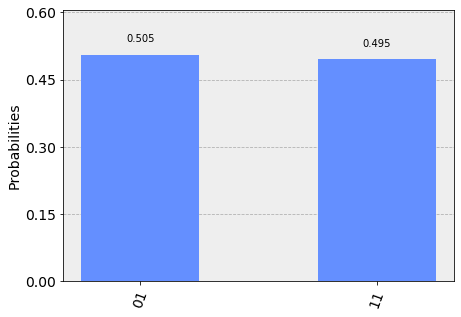

In [12]:
QC.measure(0,0)
QC.measure(1,1)
res=execute(QC,bc1,shots=3000).result().get_counts()
plot_histogram(res)

In [16]:
QC=QuantumCircuit(2,2)
QC.x(0)
QC.h(0)
QC.t(0)
QC.h(0)
QC.t(0)

# qcQC.h(0,1)
QC.draw()

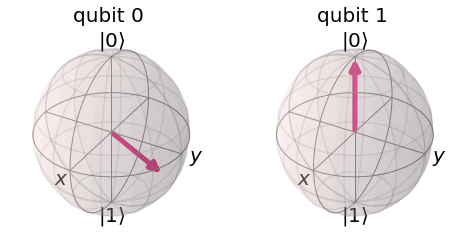

In [17]:
res=execute(QC,bc2).result().get_statevector()
plot_bloch_multivector(res)

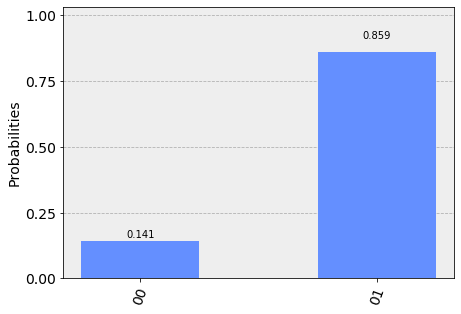

In [18]:
QC.measure(0,0)
QC.measure(1,1)
res=execute(QC,bc1,shots=3000).result().get_counts()
plot_histogram(res)